**Introduction**

A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks. The intuition behind the decision tree algorithm is simple, yet also very powerful.


For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.



This may sound a bit complicated at first, but what you probably don't realize is that you have been using decision trees to make decisions your entire life without even knowing it. Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:



1. Is this person a close friend or just an acquaintance? If the person is just an acquaintance, then decline the request; if the person is friend, then move to next step.
2. Is the person asking for the car for the first time? If so, lend them the car, otherwise move to next step.
3. Was the car damaged last time they returned the car? If yes, decline the request; if no, lend them the car.

The decision tree for the aforementioned scenario looks like this:



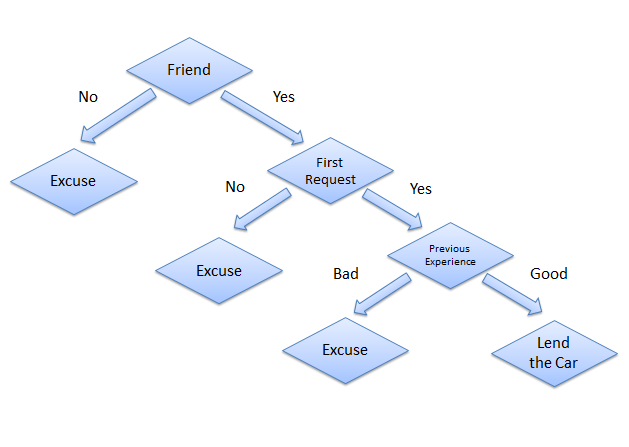

**Advantages of Decision Trees**

There are several advantages of using decision treess for predictive analysis:



1. **Decision trees can be used to predict both continuous and discrete values** i.e. they work well for both regression and classification tasks.
2. **They require relatively less effort for training the algorithm.**
3. **They can be used to classify non-linearly separable data.**
4. **They're very fast and efficient compared to KNN and other classification algorithms.**


**1. Decision Tree for Classification**

In this section we will predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.



**Data Set Information:**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


**Attribute Information:**
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Business-petrol_consumption-RandomForest/bill_authentication.csv')

In [ ]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.shape

(1372, 5)

**Preparing the Data**

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**Training and Making Predictions**

Once the data has been divided into the training and testing sets, the final step is to train the decision tree algorithm on this data and make predictions. Scikit-Learn contains the tree library, which contains built-in classes/methods for various decision tree algorithms. Since we are going to perform a classification task here, we will use the DecisionTreeClassifier class for this example. The fit method of this class is called to train the algorithm on the training data, which is passed as parameter to the fit method. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Now that our classifier has been trained, let's make predictions on the test data. To make predictions, the predict method of the DecisionTreeClassifier class is used.

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[132   3]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       135
           1       0.98      0.96      0.97       140

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 4. This is 98.5 % accuracy. Not too bad!

**2. Decision Tree for Regression**

The process of solving regression problem with decision tree using Scikit Learn is very similar to that of classification. However for regression we use DecisionTreeRegressor class of the tree library. Also the evaluation matrics for regression differ from those of classification. The rest of the process is almost same.

The dataset we will use for this section is the same that we used in the Linear Regression article. We will use this dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/Business-petrol_consumption-RandomForest/petrol_consumption.csv')

In [ ]:
df1.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df1.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


Preparing the Data

In [ ]:
X = df1.drop('Petrol_Consumption', axis=1)
y = df1['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,541.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,574.0
37,704,574.0
34,487,648.0
40,587,525.0
7,467,414.0
10,580,464.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 55.6
Mean Squared Error: 6330.2
Root Mean Squared Error: 79.56255400626604
